<a href="https://colab.research.google.com/github/Gokul0Krishna/model/blob/master/_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!unzip "/content/the precious.zip"

Archive:  /content/the precious.zip
   creating: the precious/
  inflating: the precious/classifier.pth  
  inflating: the precious/classifier_state_dict.pth  


In [5]:
!unzip "/content/fmodeltest.zip"

Archive:  /content/fmodeltest.zip
replace test/P6171199_JPG.rf.5f2c7de501bbedda9884c60099ee72f0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
import os
from PIL import Image
import copy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torchvision import models,transforms
from torch.utils.data import DataLoader,Dataset
import numpy as np
import seaborn as sns

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
testmodel = torch.load("/content/the precious/classifier.pth",weights_only=False,map_location=device)

In [8]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


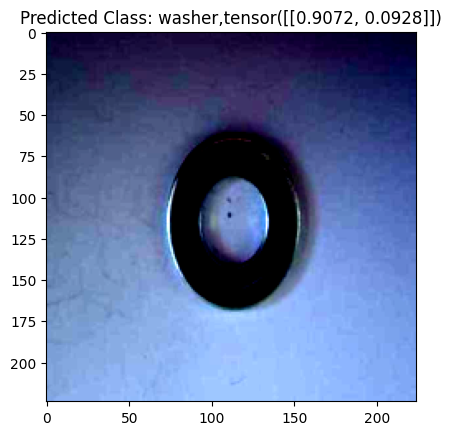

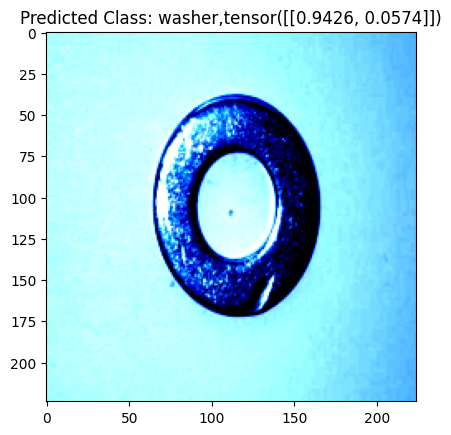

In [14]:
l=['washer','nut']
import cv2
from matplotlib import pyplot as plt
testmodel.eval()
a=0
for i in os.listdir("/content/test"):
  if a==2:
    break
  if i.endswith(".jpg"):
    img=cv2.imread("/content/test/"+i)
    # cv2_imshow(img)
    with torch.no_grad():
      img=Image.open("/content/test/"+i).convert("RGB")
      img=preprocess(img)
      img = img.unsqueeze(0)
      img = img.to(device) # Move input to the same device as the model
      ouptut=testmodel(img)
      prob=torch.softmax(ouptut,dim=1)
      predicted_class = torch.argmax(prob).item()
      img=img.squeeze(0).permute(1,2,0).cpu().numpy()
      plt.imshow(img)
      plt.title(f"Predicted Class: {l[predicted_class]},{prob}")
      plt.show()
      a+=1